### Data Visualization with Seaborn

Seaborn is a Python Visualization library based on Matplotlib that provides a high level interface for drawing attractive and informative statistical graphics. Seaborn helps in creating complex visualizations with just a few lines of code.

In [1]:
!pip install seaborn

In [2]:
import seaborn as sns

In [ ]:
##basic plotting with seaborn
tips=sns.load_dataset('tips') ##sns.load_dataset() does not load local files like .xlsx.
##It only loads prebuilt datasets from an online repository (Seaborn's GitHub).
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


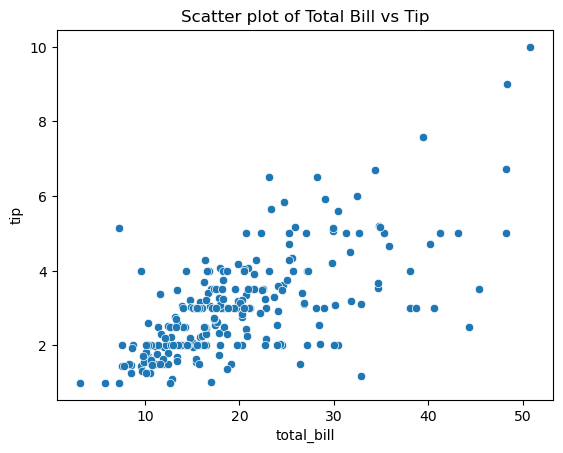

In [9]:
##Create a scatter plot
import matplotlib.pyplot as plt

sns.scatterplot(x='total_bill',y='tip',data=tips)
plt.title("Scatter plot of Total Bill vs Tip")
plt.show()


Text(0.5, 1.0, 'Line plot of total bill by Size')

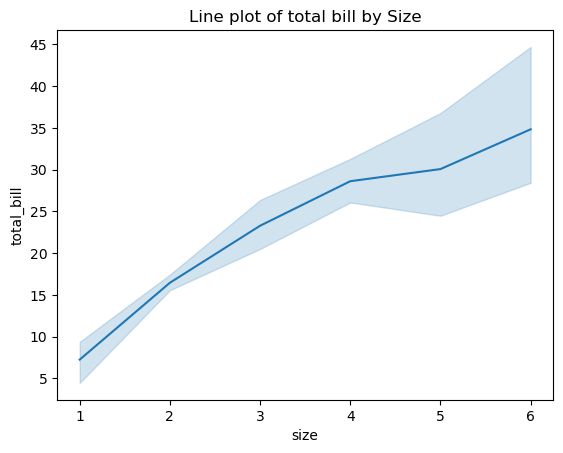

In [10]:
##line plot

sns.lineplot(x='size',y='total_bill',data=tips)
plt.title("Line plot of total bill by Size")

Text(0.5, 1.0, 'Bar plot of Total bill by Day')

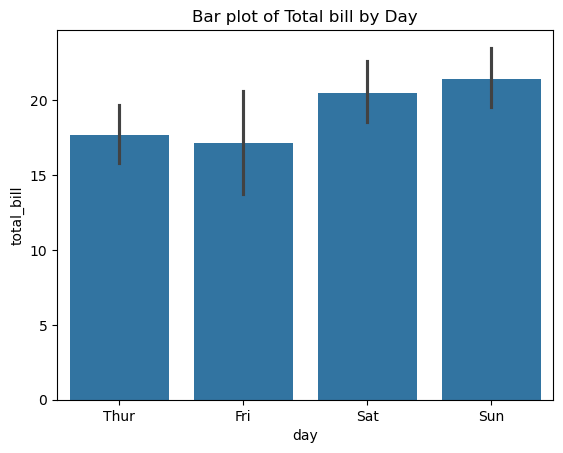

In [11]:
##categorial plots
#bar plot

sns.barplot(x='day',y='total_bill',data=tips)
plt.title("Bar plot of Total bill by Day")

Text(0.5, 1.0, 'box plot of Total bill by Day')

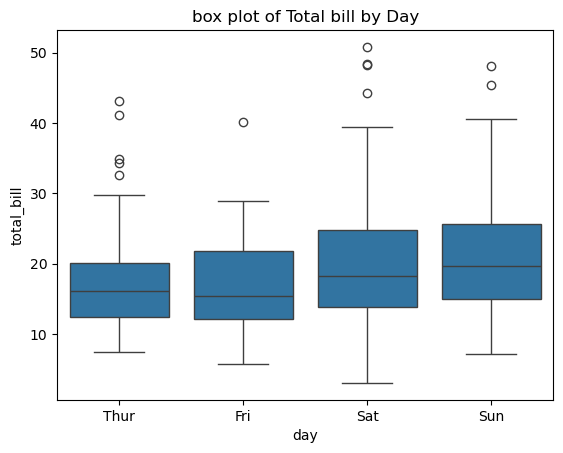

In [12]:
##box plot
sns.boxplot(x='day',y='total_bill',data=tips)
plt.title('box plot of Total bill by Day')

Text(0.5, 1.0, 'box plot of Total bill by Day')

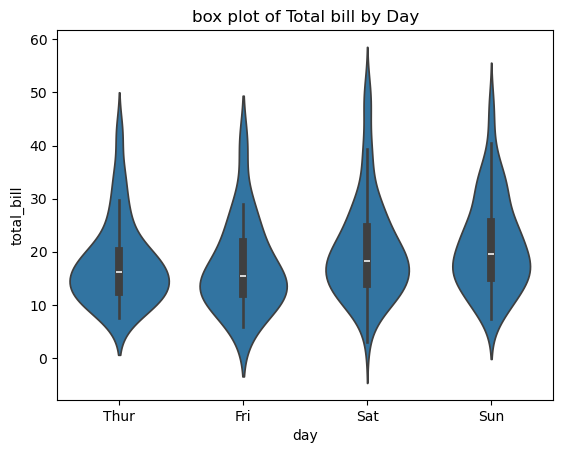

In [13]:
##violin plot

sns.violinplot(x='day',y='total_bill',data=tips)
plt.title('box plot of Total bill by Day')

<Axes: xlabel='total_bill', ylabel='Count'>

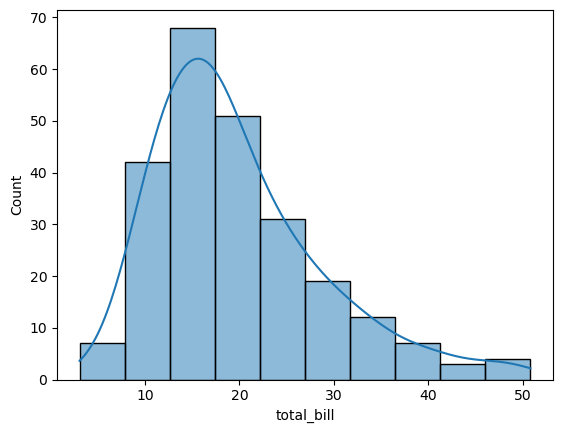

In [ ]:
##histograms

sns.histplot(tips['total_bill'],bins=10,kde=True) ##if false the curve gets hidden

<Axes: xlabel='total_bill', ylabel='Density'>

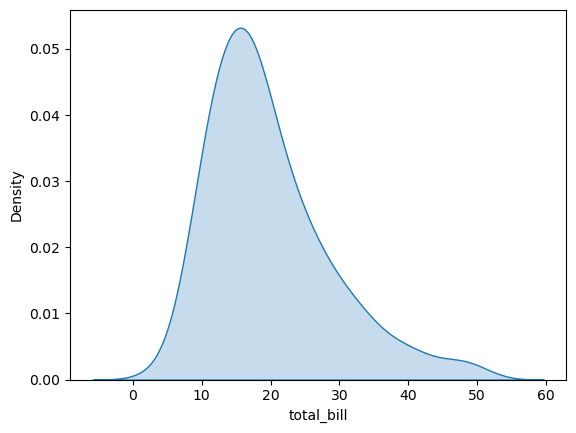

In [ ]:
##kde plot
sns.kdeplot(tips['total_bill'],fill=True) ##used fill inplace of shade(older version)

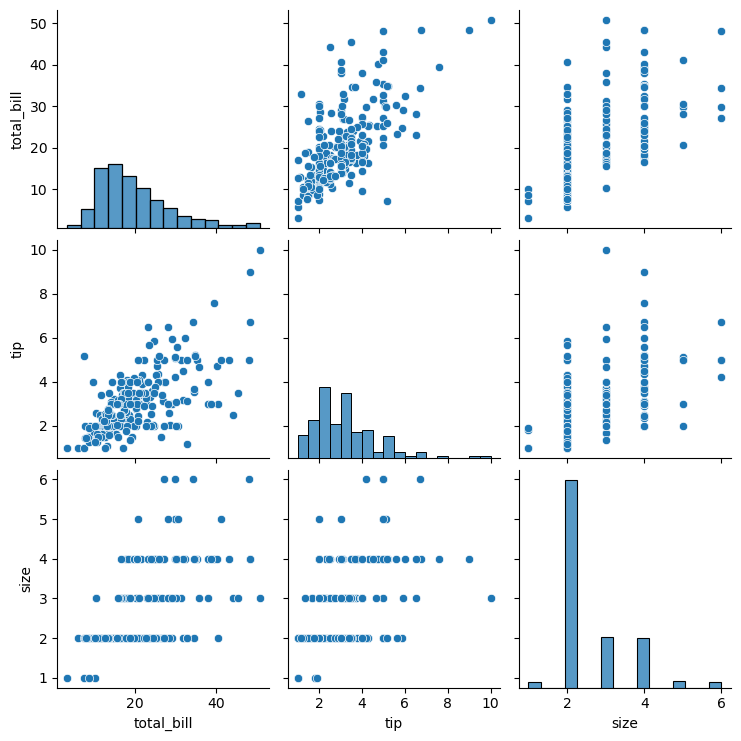

In [19]:
##Pair plot

sns.pairplot(tips)

In [ ]:
## Heat MAp

corr=tips[['total_bill','tip','size']].corr() ##works for numerical values only
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

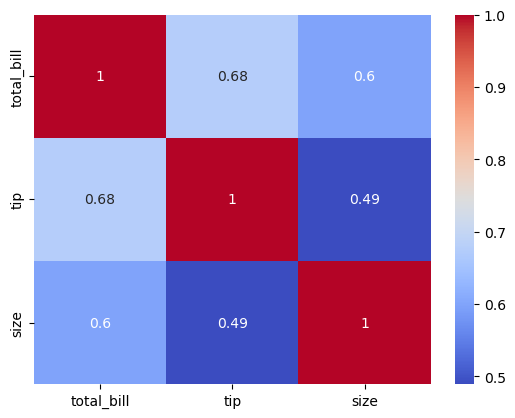

In [22]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [24]:
import pandas as pd
sales_df=pd.read_excel("Sample - Superstore.xls")
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Text(0, 0.5, 'sales')

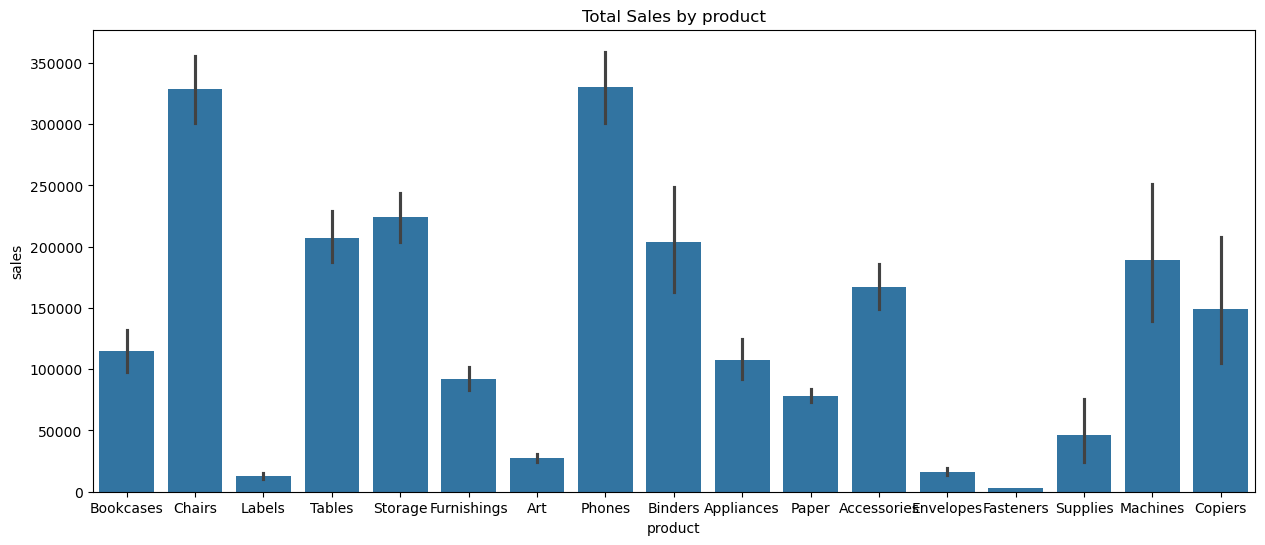

In [28]:
##plot total sales by product
plt.figure(figsize=(15,6))
sns.barplot(x='Sub-Category',y='Sales',data=sales_df,estimator=sum)
plt.title('Total Sales by product')
plt.xlabel("product")
plt.ylabel("sales")


Text(0, 0.5, 'sales')

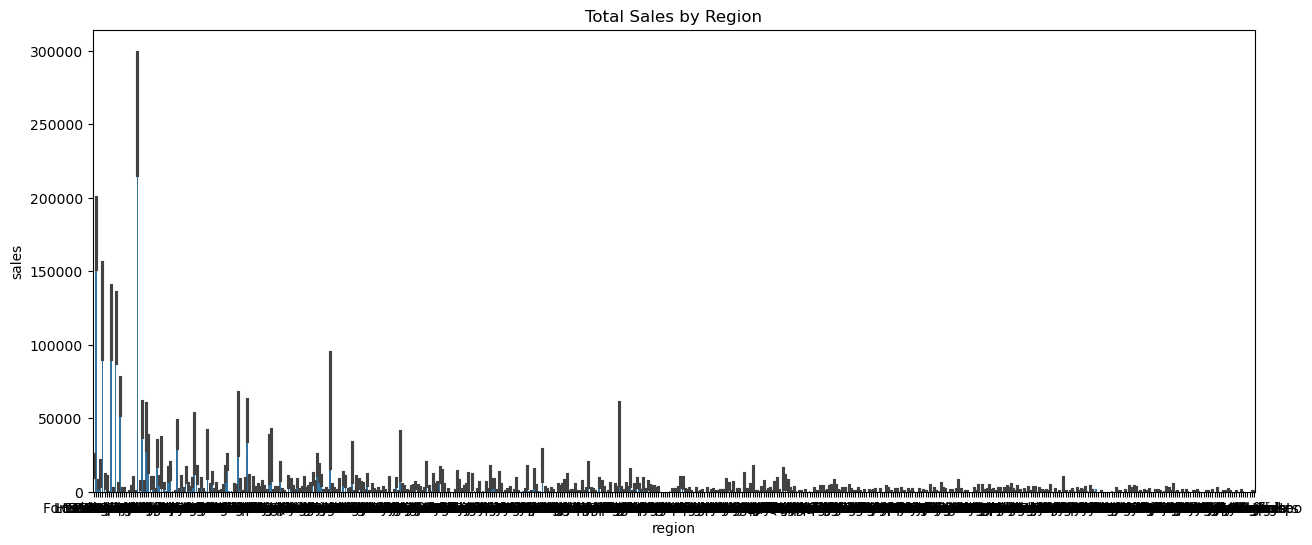

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='Sales',data=sales_df,estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel("region")
plt.ylabel("sales")

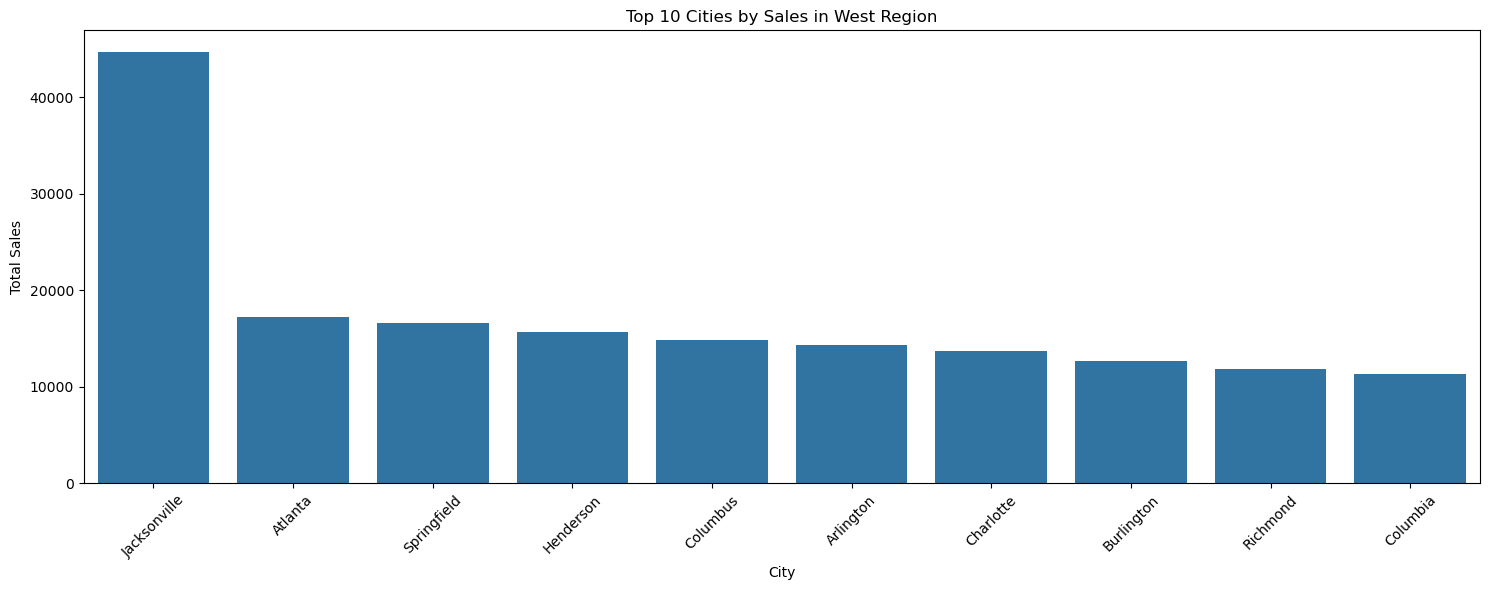

In [36]:
#Code to Filter & Plot 10 Entries from a Specific Region

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
sales_df = pd.read_excel('Sample - Superstore.xls')

# Filter for a specific region (say "West") and pick 10 random cities
region_df = sales_df[sales_df['Region'] == 'South']

# Pick top 10 cities by total sales in that region
top_cities = (
    region_df.groupby('City')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(15,6))
sns.barplot(x='City', y='Sales', data=top_cities, estimator=sum)
plt.title('Top 10 Cities by Sales in West Region')
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()
plt.show()
